# Portfolio Optimization

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# !pip install pandas-datareader
import pandas_datareader.data as web
import datetime


### Collect Data
Our investment universe consists of 20 stocks (n=20) all of which are constituents of the S&P 500. The stock symbols are F (Ford Motor Co.), CAT (Catepillar Inc.), DIS, MCD, KO, PEP, WMT, C, WFC, JPM, AAPL, IBM, PFE, JNJ, XOM, MRO, ED, T, VZ and NEM.

In [2]:
stocks = ["F", "CAT", "DIS", "MCD", "KO", "PEP", "WMT", "C", "WFC", "JPM", "AAPL", "IBM",
          "PFE", "JNJ", "XOM", "MRO", "ED", "T", "VZ", "NEM"]

Collect historical stock price from 30-Dec-2004 to 30-Sep-2008

In [3]:
start = datetime.datetime(2004,12,30)  
end = datetime.datetime(2008,9,30) 

# pandas_datareader offers remote data access
daily_price = {}

for i in stocks:
    info = web.DataReader(i, "yahoo", start, end)
    # extract daily adjusted closing prices 
    info_price = {i : info['Adj Close']}
    daily_price.update(info_price)

In [4]:
daily_price = pd.DataFrame(daily_price) 
daily_price 

,F,CAT,DIS,MCD,KO,PEP,WMT,C,WFC,JPM,AAPL,IBM,PFE,JNJ,XOM,MRO,ED,T,VZ,NEM
Date,,,,,,,,,,,,,,,,,,,,
2004-12-30,9.328557,31.554874,22.636421,20.282452,12.732676,33.171490,37.107845,350.587158,19.444393,25.094088,0.995030,63.082661,13.276471,39.717316,30.052114,7.949283,21.314610,10.499263,16.724615,34.624271
2004-12-31,9.227709,31.545166,22.571474,20.082001,12.729613,33.139755,36.939999,351.682037,19.428762,25.049150,0.988888,63.262360,13.217483,39.636074,30.187553,7.987513,21.102385,10.503343,16.613880,34.523235
2005-01-03,9.271832,30.755819,22.612068,19.931664,12.699042,32.974693,37.310658,352.338928,19.353729,25.139050,0.971844,62.729687,13.001202,39.311089,29.498526,7.768762,20.885326,10.429976,16.605675,32.929596
2005-01-04,9.240314,30.416130,22.368490,20.094528,12.521735,32.739799,37.219749,349.346252,19.369364,24.879946,0.981825,62.055878,13.001202,39.186104,29.298313,7.681689,20.822618,10.319929,16.437527,32.315483
2005-01-05,9.095345,29.833824,22.246700,19.937931,12.463651,32.777882,37.268692,353.725891,19.391243,24.931757,0.990424,61.927532,12.912727,39.161087,29.145182,7.588243,20.595921,10.368834,16.412918,32.393227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-24,3.409708,42.777790,26.953121,42.091274,16.945087,47.980503,43.706726,163.172943,24.390308,29.565556,3.952789,78.445915,10.367218,46.545868,49.260204,18.414692,25.205294,14.006592,15.820449,33.879978
2008-09-25,3.375813,42.930218,27.546986,42.666851,17.373867,48.801853,44.596882,167.045776,24.283545,31.726408,4.051679,80.904495,10.741798,47.344494,50.926838,19.023474,25.555365,14.533408,16.209890,33.389900
2008-09-26,3.260575,44.433735,27.784529,43.304077,17.718231,49.082481,45.034542,173.414307,26.553904,35.215881,3.938355,80.439705,10.753325,47.371792,50.914211,18.689325,25.473686,14.499574,16.275639,32.939976


### Parameter Estimation (Monthly)
Using monthly (last trading day of each month) adjusted closing prices for
each stock from 30-Dec-2004 to 30-Sep-2008 compute the sample mean and
sample variance for each stock. Also, compute sample covariances. 
 

In [5]:
# Only require adjusted closing prices of last trading day of each month  
asset_monthly_return = daily_price.resample('M').ffill().pct_change()
asset_monthly_return

,F,CAT,DIS,MCD,KO,PEP,WMT,C,WFC,JPM,AAPL,IBM,PFE,JNJ,XOM,MRO,ED,T,VZ,NEM
Date,,,,,,,,,,,,,,,,,,,,
2004-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-31,-0.093558,-0.082231,0.029856,0.010293,-0.003602,0.028735,-0.007951,0.018057,-0.013677,-0.034683,0.194099,-0.052343,-0.101525,0.020183,0.006633,0.029779,0.002743,-0.066142,-0.112918,-0.063500
2005-02-28,-0.039484,0.066779,-0.024101,0.021303,0.031573,0.002980,-0.015077,-0.018422,-0.023738,-0.020895,0.166710,-0.007101,0.096315,0.018299,0.232947,0.230378,-0.012915,0.012627,0.010677,0.081991
2005-03-31,-0.104348,-0.037980,0.028275,-0.058646,-0.020030,-0.011187,-0.026202,-0.058256,0.007073,-0.053352,-0.071110,-0.012962,-0.000761,0.023781,-0.058600,-0.008872,-0.013333,-0.015378,-0.013066,-0.059020
2005-04-30,-0.187331,-0.032568,-0.081100,-0.058767,0.042476,0.049218,-0.059270,0.054814,0.002341,0.036007,-0.134629,-0.164149,0.034259,0.021888,-0.043121,-0.007460,0.026079,0.018233,0.019999,-0.101302
2005-05-31,0.095500,0.068825,0.039394,0.055613,0.027394,0.011143,0.005117,0.003194,0.015929,0.007326,0.102607,-0.008239,0.033971,-0.017501,-0.009535,0.047699,0.064897,-0.017647,-0.011732,-0.016532
2005-06-30,0.026052,0.012751,-0.082362,-0.103103,-0.058533,-0.036936,0.020539,-0.018679,0.019368,-0.012028,-0.074195,-0.017869,-0.011470,-0.031296,0.022598,0.100639,0.029224,0.015825,-0.023459,0.048067
2005-07-31,0.058540,0.136578,0.018268,0.123243,0.048144,0.011126,0.023858,-0.049633,-0.003898,0.004574,0.158652,0.124798,-0.039159,-0.016000,0.022273,0.093498,0.028181,0.043458,0.002363,-0.037920
2005-08-31,-0.071695,0.029308,-0.017551,0.041065,0.005485,0.005868,-0.086075,0.006207,-0.019782,-0.035572,0.099414,-0.031705,-0.031599,-0.003795,0.024571,0.107718,-0.014125,-0.015133,-0.044406,0.054061


In [6]:
# Compute Geometric & Arithmetic Mean and sample variance 
return_add1 = (asset_monthly_return + 1 )
Geo_mean = return_add1.prod(axis=0) ** (1/45) - 1
Ari_mean = asset_monthly_return.mean()

# Arithmetic Mean and sample variance  
pd.DataFrame({'Arithmetic Mean' : Ari_mean,
              'Geometric Mean' : Geo_mean,
              'Sample variance' : asset_monthly_return.var()
               })

,Arithmetic Mean,Geometric Mean,Sample variance
F,-0.014276,-0.021158,0.014721
CAT,0.008088,0.006003,0.004283
DIS,0.004131,0.003179,0.001953
MCD,0.017955,0.016680,0.002626
KO,0.008147,0.007545,0.001234
PEP,0.009273,0.008628,0.001304
WMT,0.005057,0.004109,0.001960
C,-0.011948,-0.015202,0.006352
WFC,0.009518,0.007098,0.005304
JPM,0.009691,0.006873,0.005800


In [7]:
# use geometric mean as expected return
mu = Geo_mean

# Save file
# mu.to_csv('mu.csv')

In [8]:
# Compute sample covariance
Q = asset_monthly_return.cov()
Q

# Save file
# Q.to_csv('Q.csv')

,F,CAT,DIS,MCD,KO,PEP,WMT,C,WFC,JPM,AAPL,IBM,PFE,JNJ,XOM,MRO,ED,T,VZ,NEM
F,0.014721,0.001548,0.001057,0.002166,7.086874e-04,-0.000391,1.724197e-03,0.004618,0.001966,0.003574,0.001562,0.002104,0.001282,0.000321,0.002238,0.000780,0.001087,0.001222,0.001768,-0.000203
CAT,0.001548,0.004283,0.000862,0.001250,4.969156e-04,-0.000104,-1.611960e-04,0.000337,-0.000827,-0.000236,0.003675,0.000983,0.001181,-0.000261,0.001743,0.002795,0.000097,0.001910,0.001639,0.001442
DIS,0.001057,0.000862,0.001953,0.000913,5.041601e-04,0.000338,1.726771e-04,0.000499,-0.000515,-0.000423,0.001410,0.000938,0.000169,0.000273,0.000244,0.000657,0.000264,0.000797,0.000725,-0.001018
MCD,0.002166,0.001250,0.000913,0.002626,1.013901e-03,0.000560,1.547019e-04,0.001143,0.000282,0.000909,0.004075,0.001398,0.000633,0.000538,0.001275,0.001455,0.000758,0.001092,0.001138,0.000067
KO,0.000709,0.000497,0.000504,0.001014,1.234342e-03,0.000708,6.927632e-07,0.000575,0.000264,0.000730,0.001176,0.000475,0.000368,0.000519,0.000583,0.000352,0.000434,0.000777,0.000624,-0.000654
PEP,-0.000391,-0.000104,0.000338,0.000560,7.084121e-04,0.001304,-1.565357e-04,0.000575,0.000483,0.000724,0.000849,0.000035,0.000283,0.000677,-0.000149,-0.000256,0.000508,0.000373,0.000397,-0.001172
WMT,0.001724,-0.000161,0.000173,0.000155,6.927632e-07,-0.000157,1.959695e-03,0.000282,0.000560,0.000986,-0.000582,0.000463,-0.000710,0.000232,-0.000838,-0.001979,-0.000210,0.000028,0.000078,-0.001251
C,0.004618,0.000337,0.000499,0.001143,5.748997e-04,0.000575,2.816591e-04,0.006352,0.003721,0.004288,0.000854,0.000991,0.001176,0.000687,0.000538,-0.000697,0.000907,0.001081,0.001191,-0.001138
WFC,0.001966,-0.000827,-0.000515,0.000282,2.643581e-04,0.000483,5.599563e-04,0.003721,0.005304,0.004728,-0.002496,0.000556,0.001344,0.000434,-0.001066,-0.002649,0.000527,-0.000344,-0.000262,-0.001545
JPM,0.003574,-0.000236,-0.000423,0.000909,7.300467e-04,0.000724,9.855057e-04,0.004288,0.004728,0.005800,-0.000598,0.000676,0.001252,0.000640,-0.000544,-0.002404,0.000610,0.000524,0.000478,-0.001168


### Risk-Free Rate

In [9]:
# Compute risk-free rate by using historical data of 13 Week Treasury Bill

IRX_daily_price = web.DataReader("^IRX", "yahoo", start, end)['Adj Close'][:-1]
IRX_monthly_price = IRX_daily_price.resample('M').ffill().mean()

rf = IRX_monthly_price / (12*100)
rf

0.002953550731358321

### Risk Aversion
set to the quantity that Idzorek (see Black-Litterman paper and class slides) suggests (in this case the market (mkt) is the group of 20 stocks listed above) 



In [10]:
# Collect historical market capitalization of assets from yahoo finance (US site)
# 30-Sep-2008

asset_market_cap = np.array([12350000000.0, 35952736685.0, 55944801000.0, 68767419589.0, 122232012230.0, 
                             111965170000.0, 235605845278.0, 111770063349.0, 124645335146.0, 174048427281.0, 
                             100688632743.0, 157130846042.0, 124339728868.0, 193602657107.0, 395029171280.0, 
                             28148220000.0, 11750739423.0, 164532560000.0, 95230608718.0, 17024528133.0])

mkt_portfolio = asset_market_cap / asset_market_cap.sum()
mkt_portfolio 

array([0.00527607, 0.01535943, 0.02390028, 0.02937825, 0.05221895,
       0.04783284, 0.10065359, 0.04774949, 0.05324995, 0.07435554,
       0.04301537, 0.06712815, 0.0531194 , 0.08270933, 0.16876111,
       0.01202525, 0.00502005, 0.07029025, 0.04068364, 0.00727308])

In [11]:
# Estimate market return and variance 

expected_mkt__return = mu @ mkt_portfolio
mkt_var = mkt_portfolio.T @ Q @ mkt_portfolio

In [12]:
# Compute risk aversion 
risk_aversion = (expected_mkt__return - rf) / mkt_var

# Results
pd.DataFrame({'Output' : [rf,expected_mkt__return,mkt_var,risk_aversion]
               },index=['monthly risk-free rate','Expected Market return',
                       'Market Variance','risk_aversion'])

,Output
monthly risk-free rate,0.002954
Expected Market return,0.005974
Market Variance,0.000841
risk_aversion,3.593889


## Portfolio Optimization (use Matlab)

#### (1) Mean-variance optimization (MVO)

\begin{equation}
\begin{array}{rl}
\displaystyle \min_{x} & \lambda x^TQx-\mu ^Tx \\
s.t. & 1^Tx = 1\\
\end{array}
\end{equation}

where $\mu \in R^n$is the vector of expected returns, $Q \in R^{n \times n}$ is the covariance matrix, and $e \in R^n$ is a vector of n ones. Short selling is allowed. $\lambda > 0$ is a
risk aversion parameter.
 

In [13]:
MVO_with_short = np.array([-0.2009, -0.0264, 0.6748, 1.2014, -0.9811, 0.6750, 0.0692,
                  -1.4137, 1.5304, 0.5058, 0.0411, -0.7729, -1.2104, -0.0935,
                  0.9144, 0.3581, -0.5307, 0.6501, -0.3298, -0.0609])

MVO_without_short = np.array([0.0000, 0.0001, 0.0001, 0.3881, 0.0001, 0.1978, 0.0769,
                     0.0000, 0.1203, 0.0001, 0.0630, 0.0000, 0.0000, 0.0001, 
                     0.0001, 0.1531, 0.0001, 0.0001, 0.0000, 0.0000])

#### (2) Robust mean-variance optimization （Ellipsoidal uncertainty sets） 

\begin{equation}
\begin{array}{rl}
\displaystyle \min_{x} & \lambda x^TQx-\mu ^Tx + \epsilon_2 |\Theta^{1/2}x|_2\\
s.t. & 1^Tx = 1\\
& (x \geq 0)
\end{array}
\end{equation}

In [14]:
# Confidence levels of 90%
RMVO_90_with_short = np.array([-0.0247, 0.0320, 0.0554, 0.1094, 0.1351, 0.1553, 0.0917, 
                               -0.0377, 0.0416, 0.0295, 0.0230, 0.0366, -0.0089, 0.1291,
                               0.0604, 0.0350, 0.0843, 0.0342, 0.0057, 0.0129])

RMVO_90_without_short = np.array([0.0000, 0.0302, 0.0531, 0.0997, 0.1280, 0.1469, 0.0843, 
                                  0.0000, 0.0356, 0.0243, 0.0213, 0.0341, 0.0002, 0.1238, 
                                  0.0550, 0.0324, 0.0790, 0.0323, 0.0067, 0.0131])

# Confidence levels of 95%
RMVO_95_with_short = np.array([-0.0226, 0.0320, 0.0564, 0.1056, 0.1338, 0.1522, 0.0901, 
                               -0.0340, 0.0402, 0.0288, 0.0221, 0.0370, -0.0057, 0.1301, 
                               0.0588,  0.0336, 0.0850, 0.0345, 0.0085, 0.0134])

RMVO_95_without_short = np.array([0.0000, 0.0304, 0.0542, 0.0974, 0.1275, 0.1451, 0.0837,
                                  0.0000, 0.0351, 0.0243, 0.0207, 0.0347, 0.0003, 0.1252,
                                  0.0543, 0.0315, 0.0802, 0.0328, 0.0090, 0.0135])


#### (3) Risk Parity optimization with no short selling

\begin{equation}
\begin{array}{rl}
\displaystyle \min_{x,\theta} & \sum_{i=1}^n (x_i(Qx)_i -\theta)^2\\
s.t. & 1^Tx = 1\\
& (x \geq 0)
\end{array}
\end{equation}

In [15]:
RP = np.array([0.0450, 0.0500, 0.0512, 0.0500, 0.0513, 0.0515, 0.0513, 0.0495, 0.0518, 
               0.0509, 0.0425, 0.0507, 0.0510, 0.0514, 0.0499, 0.0491, 0.0513, 0.0503, 
               0.0504, 0.0511])

#### (4) Market Portfolio (based on market capitalizations)
 

In [16]:
# more detail is presented in the Parameter Estimation part 
mkt_portfolio 

array([0.00527607, 0.01535943, 0.02390028, 0.02937825, 0.05221895,
       0.04783284, 0.10065359, 0.04774949, 0.05324995, 0.07435554,
       0.04301537, 0.06712815, 0.0531194 , 0.08270933, 0.16876111,
       0.01202525, 0.00502005, 0.07029025, 0.04068364, 0.00727308])

Combine all portfolios

In [17]:
all_portfolios = pd.DataFrame({'MVO no short' : MVO_without_short,
                               'MVO short' : MVO_with_short,
                                
                               'RMVO_90 no short' : RMVO_90_without_short,
                               'RMVO_95 no short' : RMVO_95_without_short,
                               'RMVO_90 short' : RMVO_90_with_short,
                               'RMVO_95 short' : RMVO_95_with_short,
                               
                               'ERC' : RP,
                               'Market Portfolio':mkt_portfolio 
                              },index=stocks)
all_portfolios

,MVO no short,MVO short,RMVO_90 no short,RMVO_95 no short,RMVO_90 short,RMVO_95 short,ERC,Market Portfolio
F,0.0000,-0.2009,0.0000,0.0000,-0.0247,-0.0226,0.0450,0.005276
CAT,0.0001,-0.0264,0.0302,0.0304,0.0320,0.0320,0.0500,0.015359
DIS,0.0001,0.6748,0.0531,0.0542,0.0554,0.0564,0.0512,0.023900
MCD,0.3881,1.2014,0.0997,0.0974,0.1094,0.1056,0.0500,0.029378
KO,0.0001,-0.9811,0.1280,0.1275,0.1351,0.1338,0.0513,0.052219
PEP,0.1978,0.6750,0.1469,0.1451,0.1553,0.1522,0.0515,0.047833
WMT,0.0769,0.0692,0.0843,0.0837,0.0917,0.0901,0.0513,0.100654
C,0.0000,-1.4137,0.0000,0.0000,-0.0377,-0.0340,0.0495,0.047749
WFC,0.1203,1.5304,0.0356,0.0351,0.0416,0.0402,0.0518,0.053250
JPM,0.0001,0.5058,0.0243,0.0243,0.0295,0.0288,0.0509,0.074356


##### Plots

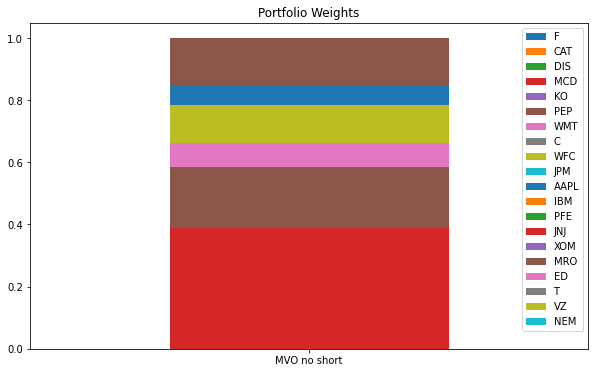

In [18]:
# Plot Portfolio Weights of MVO without short selling 
all_portfolios.iloc[:,0:1].T.plot.bar(figsize=(10,6), stacked=True, title ='')
plt.title('Portfolio Weights')
plt.xticks(rotation=0.1)
plt.show()

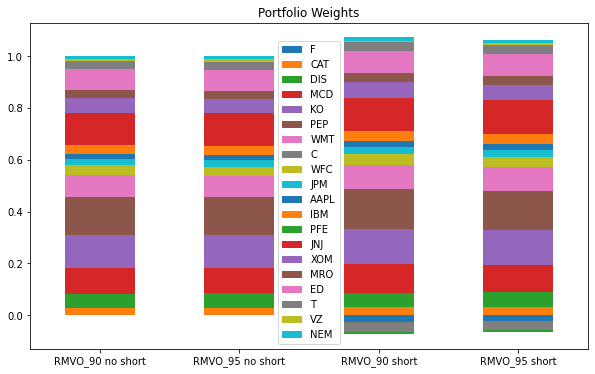

In [19]:
# Plot Portfolio Weights of robust MVO with and without short selling 

all_portfolios.iloc[:,2:6].T.plot.bar(figsize=(10,6), stacked=True, title ='')
# plt.ylim([-10,10])
plt.title('Portfolio Weights')
plt.xticks(rotation=0.1)
plt.show()

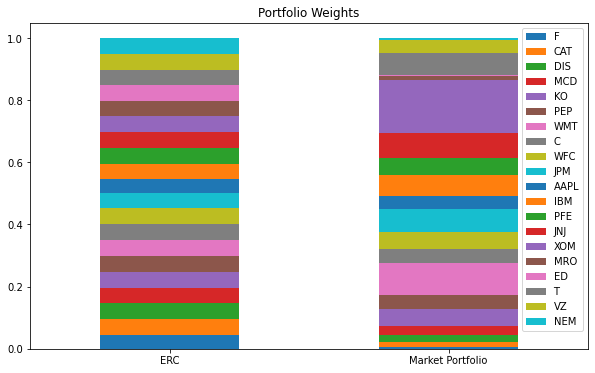

In [20]:
# Plot Portfolio Weights of ERC and market portfolio

all_portfolios.iloc[:,6:].T.plot.bar(figsize=(10,6), stacked=True, title ='')
plt.title('Portfolio Weights')
plt.xticks(rotation=0.1)
plt.show()

## PART A

In [21]:
end2 = datetime.datetime(2008,11,5) 

# pandas_datareader offers remote data access
daily_price2 = {}

for i in stocks:
    info = web.DataReader(i, "yahoo", start, end2)
    # extract daily adjusted closing prices 
    info_price = {i : info['Adj Close']}
    daily_price2.update(info_price)

daily_price2 = pd.DataFrame(daily_price2) 

In [22]:
# Compute asset monthly return 
asset_monthly_return2 = daily_price2.resample('M').ffill().pct_change()
asset_monthly_return2.tail()

,F,CAT,DIS,MCD,KO,PEP,WMT,C,WFC,JPM,AAPL,IBM,PFE,JNJ,XOM,MRO,ED,T,VZ,NEM
Date,,,,,,,,,,,,,,,,,,,,
2008-07-31,-0.002079,-0.052608,-0.027244,0.063500,-0.009234,0.046705,0.043060,0.134455,0.274526,0.197465,-0.050705,0.079726,0.068689,0.064190,-0.087371,-0.046269,0.015605,-0.074153,-0.025812,-0.080521
2008-08-31,-0.070833,0.017405,0.065898,0.043265,0.011068,0.028846,0.011740,0.016051,0.010898,-0.052670,0.066561,-0.045131,0.040459,0.035307,-0.000141,-0.084042,0.044957,0.038299,0.031727,-0.059633
2008-09-30,0.165919,-0.157359,-0.051314,-0.004839,0.022779,0.047149,0.013882,0.080042,0.239841,0.213302,-0.329558,-0.039185,-0.035060,-0.016329,-0.029371,-0.115376,0.050367,-0.127227,-0.086275,-0.138570
2008-10-31,-0.578846,-0.352596,-0.155751,-0.061102,-0.166793,-0.200085,-0.068125,-0.326119,-0.092726,-0.109887,-0.053405,-0.205113,-0.039588,-0.114607,-0.045583,-0.270128,0.008380,-0.026054,-0.059445,-0.320433
2008-11-30,-0.045662,0.057592,-0.064840,-0.033316,0.015206,0.000000,-0.030102,-0.074725,-0.060505,-0.049212,-0.039874,-0.032591,-0.023110,-0.024291,-0.005802,0.029553,0.005309,0.014195,0.039434,0.055809


##### Compute the major portfolio quantities for each portfolio for the month of Oct. 2008  
1. portfolio return
2. portfolio variance and standard deviation  
3. Sharpe ratio. 

Discuss the results i.e. explain why you think a portfolio did better than another on these portfolio dimensions e.g. why was the Sharpe ratio of a portfolio from a particular strategy better than a portfolio generated by a di¤erent strategy? and which portfolio did best
(worst) on return and why?

In [23]:
def compute_quantity (asset_return):
    # 1. portfolio return
    port_return = all_portfolios.T @ asset_return
    port_return = np.array(port_return)

    # 2. portfolio variance and standard deviation
    port_var = np.diag(all_portfolios.T @ Q @ all_portfolios)
    port_sd = np.sqrt(port_var)

    # 3. Sharpe ratio
    sharp_ratio = (port_return - rf) / port_sd

    results = pd.DataFrame({'portfolio return' : port_return,
                               'portfolio var' : port_var,
                               'portfolio sd' : port_sd,
                               'Sharpe ratio' : sharp_ratio},
                              index = portfolios)
    return results

In [24]:
portfolios =  ["MVO_without_short", "MVO_with_short", "RMVO_90_without_short",
               "RMVO_95_without_short", "RMVO_90_with_short", "RMVO_95_with_short",
               "RP", "mkt_portfolio" ]

In [25]:
# Realized return for each stock for the month of Oct of 2008 
oct_asset_return = asset_monthly_return2.iloc[-2,:]

# Save file
# oct_asset_return.to_csv('oct_asset_return.csv')

oct_result = compute_quantity (oct_asset_return)
oct_result

,portfolio return,portfolio var,portfolio sd,Sharpe ratio
MVO_without_short,-0.124502,0.001281,0.035796,-3.560637
MVO_with_short,0.328795,0.010965,0.104712,3.111786
RMVO_90_without_short,-0.125830,0.000586,0.024207,-5.320151
RMVO_95_without_short,-0.125649,0.000582,0.024131,-5.329426
RMVO_90_with_short,-0.107001,0.000570,0.023870,-4.606427
RMVO_95_with_short,-0.108346,0.000564,0.023755,-4.685286
RP,-0.159970,0.000894,0.029898,-5.449223
mkt_portfolio,-0.112932,0.000841,0.028992,-3.997221


## PART B 

In [26]:
# Realized return for each stock for the month of Nov of 2008 
nov_asset_return = asset_monthly_return2.iloc[-1,:]
nov_result = compute_quantity (nov_asset_return)
nov_result

,portfolio return,portfolio var,portfolio sd,Sharpe ratio
MVO_without_short,-0.020516,0.001281,0.035796,-0.655660
MVO_with_short,-0.055900,0.010965,0.104712,-0.562048
RMVO_90_without_short,-0.011427,0.000586,0.024207,-0.594079
RMVO_95_without_short,-0.011298,0.000582,0.024131,-0.590585
RMVO_90_with_short,-0.008602,0.000570,0.023870,-0.484116
RMVO_95_with_short,-0.008726,0.000564,0.023755,-0.491681
RP,-0.013050,0.000894,0.029898,-0.535257
mkt_portfolio,-0.019298,0.000841,0.028992,-0.767534


In [27]:
# Realized return for each stock for selected date before crisis
# asset_monthly_return2.iloc[11,:] 
select_result = compute_quantity (asset_monthly_return2.iloc[11,:])
select_result

,portfolio return,portfolio var,portfolio sd,Sharpe ratio
MVO_without_short,0.054869,0.001281,0.035796,1.450327
MVO_with_short,0.135842,0.010965,0.104712,1.269081
RMVO_90_without_short,0.030844,0.000586,0.024207,1.152194
RMVO_95_without_short,0.030647,0.000582,0.024131,1.147632
RMVO_90_with_short,0.031604,0.000570,0.023870,1.200286
RMVO_95_with_short,0.031198,0.000564,0.023755,1.188988
RP,0.040229,0.000894,0.029898,1.246743
mkt_portfolio,0.040054,0.000841,0.028992,1.279683


In [28]:
# Compare Sharpe ratio of different periods

pd.DataFrame({'Oct 2008' : oct_result['Sharpe ratio'],
              'Nov 2008' : nov_result['Sharpe ratio'],
              'Before Crisis' : select_result['Sharpe ratio']
             } )

,Oct 2008,Nov 2008,Before Crisis
MVO_without_short,-3.560637,-0.655660,1.450327
MVO_with_short,3.111786,-0.562048,1.269081
RMVO_90_without_short,-5.320151,-0.594079,1.152194
RMVO_95_without_short,-5.329426,-0.590585,1.147632
RMVO_90_with_short,-4.606427,-0.484116,1.200286
RMVO_95_with_short,-4.685286,-0.491681,1.188988
RP,-5.449223,-0.535257,1.246743
mkt_portfolio,-3.997221,-0.767534,1.279683


## Discussion

##### Daily asset price

In [29]:
end3 = datetime.datetime(2012,11,5) 

# pandas_datareader offers remote data access
daily_price3 = {}

for i in stocks:
    info = web.DataReader(i, "yahoo", start, end3)
    # extract daily adjusted closing prices 
    info_price = {i : info['Adj Close']}
    daily_price3.update(info_price)

daily_price3 = pd.DataFrame(daily_price3)

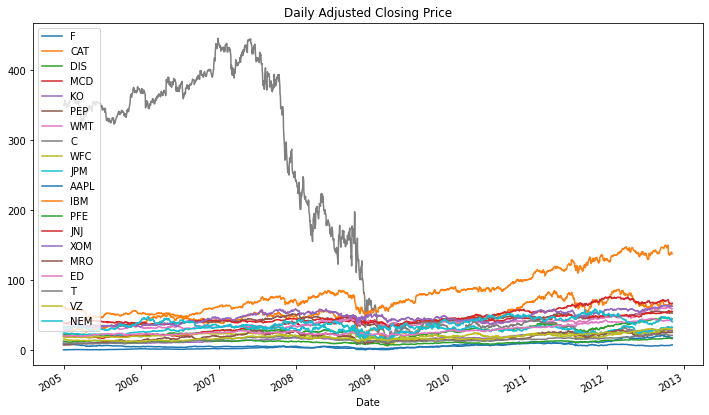

In [30]:
# plot daily adjusted closing price of assets
daily_price3.plot(figsize=(12,7),title='Daily Adjusted Closing Price')
# plt.ylim([0,200])
plt.show()

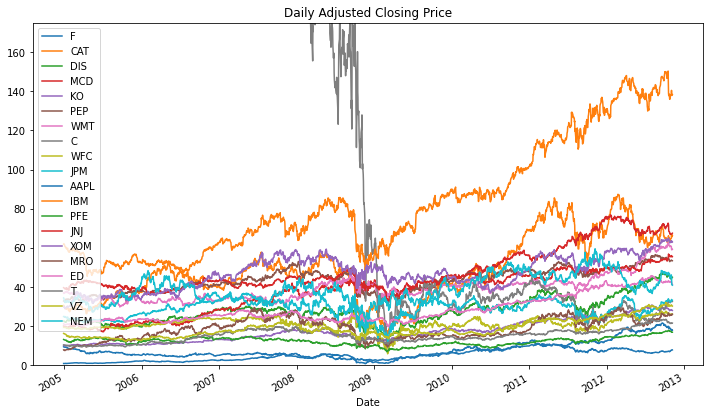

In [31]:
# zoomed plot
daily_price3.plot(figsize=(12,7),title='Daily Adjusted Closing Price')
plt.ylim([0,175])
plt.show()